# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context
Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings. In this homework, you'll implement logistic regression on the Heart Disease Dataset—a real-world UCI repository collection of 303 patient records with 14 features and a binary target (1 for disease presence, 0 for absence). You'll train models, visualize boundaries, apply regularization, and explore deployment via Amazon SageMaker to mimic a production pipeline.

## Homework Instructions
Complete this in a Jupyter notebook, implementing functions from class theory (e.g., sigmoid, cost, GD). Use NumPy, Pandas, and Matplotlib—no scikit-learn for core training. Emphasize exploration: Tune parameters, interpret results, and document findings.

## Step 1: Load and Prepare the Dataset

In [78]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [80]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [81]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [82]:
df.shape

(270, 14)

In [83]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

In [84]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [85]:
# Convert categorical target variable to numerical
df['target'] = df['Heart Disease'].map({'Presence':1, 'Absence':0})

df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


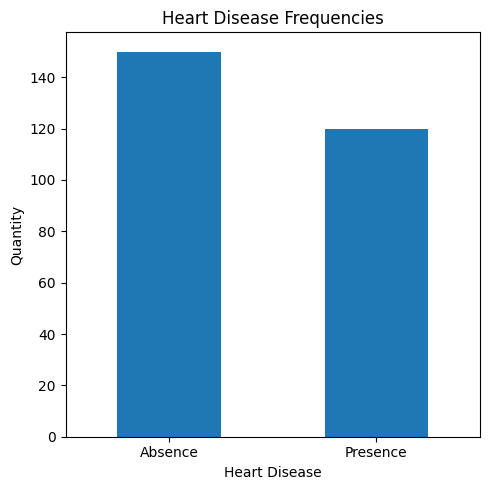

In [86]:

frequencies = df['Heart Disease'].value_counts()

plt.figure(figsize=(5,5))
frequencies.plot(kind='bar')
plt.title('Heart Disease Frequencies')
plt.ylabel('Quantity')
plt.xlabel('Heart Disease')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Selecting features to normalize

In [87]:
feature_names = [
    'Age',
    'Cholesterol',
    'BP',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

print(f"\nSelected features ({len(feature_names)}):")
for i, feature in enumerate(feature_names, 1):
    print(f"  {i}. {feature}")


Selected features (6):
  1. Age
  2. Cholesterol
  3. BP
  4. Max HR
  5. ST depression
  6. Number of vessels fluro


In [88]:
# Extract features and target as NumPy arrays
X = df[feature_names].values
y = df['target'].values

print(f"\n Extracted data:")
print(f"  X.shape = {X.shape} (n_samples={X.shape[0]}, n_features={X.shape[1]})")
print(f"  y.shape = {y.shape[0]}")


 Extracted data:
  X.shape = (270, 6) (n_samples=270, n_features=6)
  y.shape = 270


In [89]:
print(f"\n Original value ranges:")
print("-" * 80)
for i, feature in enumerate(feature_names):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    mean_val = X[:, i].mean()
    std_val = X[:, i].std()
    print(f"  {feature:25s}: [{min_val:7.2f}, {max_val:7.2f}]  μ={mean_val:7.2f}  σ={std_val:6.2f}")


 Original value ranges:
--------------------------------------------------------------------------------
  Age                      : [  29.00,   77.00]  μ=  54.43  σ=  9.09
  Cholesterol              : [ 126.00,  564.00]  μ= 249.66  σ= 51.59
  BP                       : [  94.00,  200.00]  μ= 131.34  σ= 17.83
  Max HR                   : [  71.00,  202.00]  μ= 149.68  σ= 23.12
  ST depression            : [   0.00,    6.20]  μ=   1.05  σ=  1.14
  Number of vessels fluro  : [   0.00,    3.00]  μ=   0.67  σ=  0.94


In [90]:
print("70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)")

np.random.seed(42)

# Obtain indices for each class
indices_clase_0 = np.where(y == 0)[0]
indices_clase_1 = np.where(y == 1)[0]

print(f"\n📊 Distribución original:")
print(f"  Clase 0 (Absence):  {len(indices_clase_0)} muestras ({len(indices_clase_0)/len(y)*100:.2f}%)")
print(f"  Clase 1 (Presence): {len(indices_clase_1)} muestras ({len(indices_clase_1)/len(y)*100:.2f}%)")

# Randomly mix each class
np.random.shuffle(indices_clase_0)
np.random.shuffle(indices_clase_1)


# Calculate split points (70% train, 30% test)
n_train_0 = int(0.7 * len(indices_clase_0))
n_train_1 = int(0.7 * len(indices_clase_1))

print(f"\n Split points (70/30):")
print(f"  Clase 0: {n_train_0} train, {len(indices_clase_0) - n_train_0} test")
print(f"  Clase 1: {n_train_1} train, {len(indices_clase_1) - n_train_1} test")

# Split each class
train_indices_0 = indices_clase_0[:n_train_0]
test_indices_0 = indices_clase_0[n_train_0:]

train_indices_1 = indices_clase_1[:n_train_1]
test_indices_1 = indices_clase_1[n_train_1:]

# Combine the sets
train_indices = np.concatenate([train_indices_0, train_indices_1])
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Mix the combined indices
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Create the final sets
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)

📊 Distribución original:
  Clase 0 (Absence):  150 muestras (55.56%)
  Clase 1 (Presence): 120 muestras (44.44%)

 Split points (70/30):
  Clase 0: 105 train, 45 test
  Clase 1: 84 train, 36 test


In [91]:
train_class_0 = np.sum(y_train == 0)
train_class_1 = np.sum(y_train == 1)
test_class_0 = np.sum(y_test == 0)
test_class_1 = np.sum(y_test == 1)

print(f"\n📊 STRATIFICATION VERIFICATION:")
print("-" * 80)
print(f"{'Set':<15} {'Total':>8} {'Class 0':>12} {'%':>8} {'Class 1':>12} {'%':>8}")
print("-" * 80)
print(f"{'Original':<15} {len(y):>8} {len(indices_clase_0):>12} {len(indices_clase_0)/len(y)*100:>7.2f}% {len(indices_clase_1):>12} {len(indices_clase_1)/len(y)*100:>7.2f}%")
print(f"{'Train':<15} {len(y_train):>8} {train_class_0:>12} {train_class_0/len(y_train)*100:>7.2f}% {train_class_1:>12} {train_class_1/len(y_train)*100:>7.2f}%")
print(f"{'Test':<15} {len(y_test):>8} {test_class_0:>12} {test_class_0/len(y_test)*100:>7.2f}% {test_class_1:>12} {test_class_1/len(y_test)*100:>7.2f}%")


print("\n Successful stratification")





📊 STRATIFICATION VERIFICATION:
--------------------------------------------------------------------------------
Set                Total      Class 0        %      Class 1        %
--------------------------------------------------------------------------------
Original             270          150   55.56%          120   44.44%
Train                189          105   55.56%           84   44.44%
Test                  81           45   55.56%           36   44.44%

 Successful stratification


In [92]:

print("STANDARDIZATION")

# Calculate the mean and standard deviation of the train set
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

print(f"\n📊 Statistics for normalization (calculated from the train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean (μ)':>12} {'Std (σ)':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    print(f"{feature:<25} {mean_train[i]:>12.2f} {std_train[i]:>12.2f}")

# Apply standardization
X_train_normalized = (X_train - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train 

print("Applied standardization")

# Verify the standardization
print(f"\n📊 Post-normalization verification (train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    mean_check = np.mean(X_train_normalized[:, i])
    std_check = np.std(X_train_normalized[:, i])
    min_check = np.min(X_train_normalized[:, i])
    max_check = np.max(X_train_normalized[:, i])
    print(f"{feature:<25} {mean_check:>12.4f} {std_check:>12.4f} {min_check:>12.2f} {max_check:>12.2f}")



STANDARDIZATION

📊 Statistics for normalization (calculated from the train set):
--------------------------------------------------------------------------------
Feature                       Mean (μ)      Std (σ)
--------------------------------------------------------------------------------
Age                              54.21         9.01
Cholesterol                     247.19        53.23
BP                              131.54        17.68
Max HR                          150.41        22.19
ST depression                     1.05         1.12
Number of vessels fluro           0.62         0.89
Applied standardization

📊 Post-normalization verification (train set):
--------------------------------------------------------------------------------
Feature                           Mean          Std          Min          Max
--------------------------------------------------------------------------------
Age                             0.0000       1.0000        -2.80         1.86
Cho

In [93]:
print(f"\n COMPLETE PREPARATION")
print("-" * 80)
print(f"Selected features: {len(feature_names)}")
print(f"  {', '.join(feature_names)}")
print(f"\nTraining set:")
print(f"  X_train_normalized.shape = {X_train_normalized.shape}")
print(f"  y_train.shape = {y_train.shape}")
print(f"  Distribution: Clase 0={train_class_0}, Clase 1={train_class_1}")
print(f"\nTest set:")
print(f"  X_test_normalized.shape = {X_test_normalized.shape}")
print(f"  y_test.shape = {y_test.shape}")
print(f"  Distribution: Clase 0={test_class_0}, Clase 1={test_class_1}")
print("="*80)
print(" STEP 1 COMPLETED")
print("="*80)


 COMPLETE PREPARATION
--------------------------------------------------------------------------------
Selected features: 6
  Age, Cholesterol, BP, Max HR, ST depression, Number of vessels fluro

Training set:
  X_train_normalized.shape = (189, 6)
  y_train.shape = (189,)
  Distribution: Clase 0=105, Clase 1=84

Test set:
  X_test_normalized.shape = (81, 6)
  y_test.shape = (81,)
  Distribution: Clase 0=45, Clase 1=36
 STEP 1 COMPLETED


## Step 2: Implement Basic Logistic Regression

- Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).
- Train on full train set (α~0.01, 1000+ iters). Plot cost vs. iterations.
- Predict (threshold 0.5); evaluate acc/precision/recall/F1 on train/test.

### Sigmoid Function

In [94]:
def sigmoid(z):
    """
    sigmoid function
    Convert any real number z to a value between 0 and 1.
    
    Args:
        z: scalar, NumPy array, or matrix
    
    Returns:
        sigmoid(z) = 1 / (1 + e^(-z)) 
    """
    return 1 / (1 + np.exp(-z))

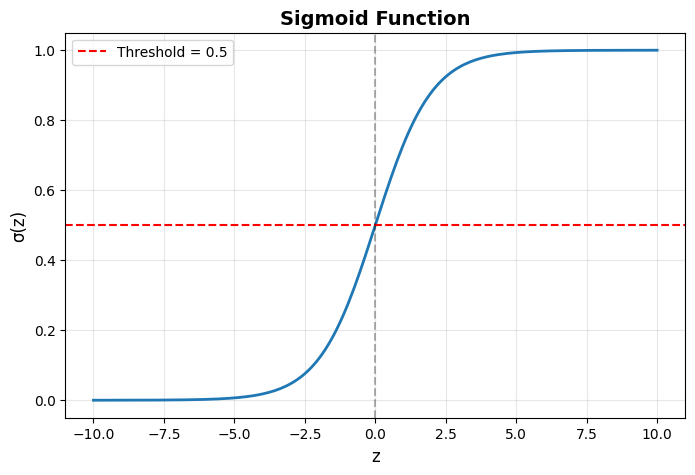

Important sigmoid values:
  σ(-∞) ≈ σ(-10) = 0.000045  (close to 0)
  σ(0)   = 0.500000  (exactly 0.5)
  σ(+∞) ≈ σ(+10) = 0.999955  (close to 1)


In [95]:
z_test = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 5))
plt.plot(z_test, sigmoid(z_test), linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

print("Important sigmoid values:")
print(f"  σ(-∞) ≈ σ(-10) = {sigmoid(-10):.6f}  (close to 0)")
print(f"  σ(0)   = {sigmoid(0):.6f}  (exactly 0.5)")
print(f"  σ(+∞) ≈ σ(+10) = {sigmoid(10):.6f}  (close to 1)")

### Cost Function

$$
J(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
+
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right].
$$

In [96]:
def compute_cost(w, b, X, y):
    """
    Calculate the logistic regression cost J(w,b).

    
    donde f^(i) = σ(w·x^(i) + b)
    
    Args:
        w: array (n_features,) - weights
        b: float - bias
        X: array (m, n_features) - features
        y: array (m,) - labels (0 o 1)
    
    Returns:
        J: float - Cost
    """
    m = X.shape[0]  

    z = X @ w + b 
    
    f = sigmoid(z) 
    
    # Clipping to avoid log(0) which would give -inf
    eps = 1e-8
    f = np.clip(f, eps, 1 - eps)
    cost = -(1/m) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))
    
    return cost



m_train, n_features = X_train_normalized.shape
w_test = np.zeros(n_features)
b_test = 0.0

J_initial = compute_cost(w_test, b_test, X_train_normalized, y_train)
print(f"Initial cost (w=0, b=0): J = {J_initial:.4f}")
print(f"  (With all weights zero, f=0.5 for all examples → J ≈ 0.693 = -log(0.5))")

Initial cost (w=0, b=0): J = 0.6931
  (With all weights zero, f=0.5 for all examples → J ≈ 0.693 = -log(0.5))


### Gradients

$$
\frac{\partial J}{\partial w_j}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
x^{(i)}_j,
$$

$$
\frac{\partial J}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right).
$$

In [97]:
def compute_gradient(w, b, X, y):
    """
    Compute the gradients ∂J/∂w y ∂J/∂b.
    
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        y: array (m,)
    
    Returns:
        dj_dw: array (n_features,) - gradient respect to a w
        dj_db: float - gradient respect to a b
    """
    m = X.shape[0]
    
    # Compute predictions
    z = X @ w + b
    f = sigmoid(z)  
    
    # Campute error: e^(i) = f^(i) - y^(i)
    error = f - y  
    
    # Gradients
    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db


# Compute initial gradients
dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_train_normalized, y_train)
print("Initial Gradients (w=0, b=0):")
print(f"  dj_dw shape: {dj_dw_test.shape}")
print(f"  dj_dw: {dj_dw_test}")
print(f"  dj_db: {dj_db_test:.6f}")

Initial Gradients (w=0, b=0):
  dj_dw shape: (6,)
  dj_dw: [-0.08350592 -0.03523253 -0.0561607   0.21027185 -0.20126332 -0.23027375]
  dj_db: 0.055556


### Gradient Descent

$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j},
$$

$$
b := b - \alpha \frac{\partial J}{\partial b},
$$

Using $\alpha$ as the learning rate.

In [98]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    """
    Execute gradient descent to minimize J(w,b).
    
    Args:
        X: array (m, n_features) - training features
        y: array (m,) - training labels
        w_init: array (n_features,) - initial values of w
        b_init: float - initial value of b
        alpha: float - learning rate 
        num_iters: int - iterations
        print_every: int - print every n iterations
    
    Returns:
        w: array (n_features,) - optimized weights
        b: float - optimized bias
        J_history: list - history of costs in each iteration
    """
    
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J = compute_cost(w, b, X, y)
        J_history.append(J)
        
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:5d}: J = {J:.6f}")
    
    return w, b, J_history


### Training Model

In [99]:
w_init = np.zeros(n_features)
b_init = 0.0


alpha = 0.01  
num_iters = 1000

print(f"\nHyperparameters:")
print(f"  Learning rate (α): {alpha}")
print(f"  Iterations: {num_iters}")
print(f"  initializing: w=zeros({n_features}), b=0\n")

# Training
w_trained, b_trained, J_history = gradient_descent(
    X_train_normalized, 
    y_train, 
    w_init, 
    b_init, 
    alpha, 
    num_iters,
    print_every=100
)

print(f"\n Training Completed")
print(f"\nFinal Parameters:")
print(f"  w = {w_trained}")
print(f"  b = {b_trained:.6f}")
print(f"\nFinal Cost: J = {J_history[-1]:.6f}")
print(f"Initial Cost: J = {J_history[0]:.6f}")
print(f"Reduction: {J_history[0] - J_history[-1]:.6f}")


Hyperparameters:
  Learning rate (α): 0.01
  Iterations: 1000
  initializing: w=zeros(6), b=0

Iteration     0: J = 0.691629
Iteration   100: J = 0.593247
Iteration   200: J = 0.550114
Iteration   300: J = 0.527720
Iteration   400: J = 0.514532
Iteration   500: J = 0.506047
Iteration   600: J = 0.500229
Iteration   700: J = 0.496046
Iteration   800: J = 0.492927
Iteration   900: J = 0.490534
Iteration   999: J = 0.488674

 Training Completed

Final Parameters:
  w = [-0.07188915  0.09333729  0.10392364 -0.57740194  0.56125769  0.7631357 ]
  b = -0.187853

Final Cost: J = 0.488674
Initial Cost: J = 0.691629
Reduction: 0.202955


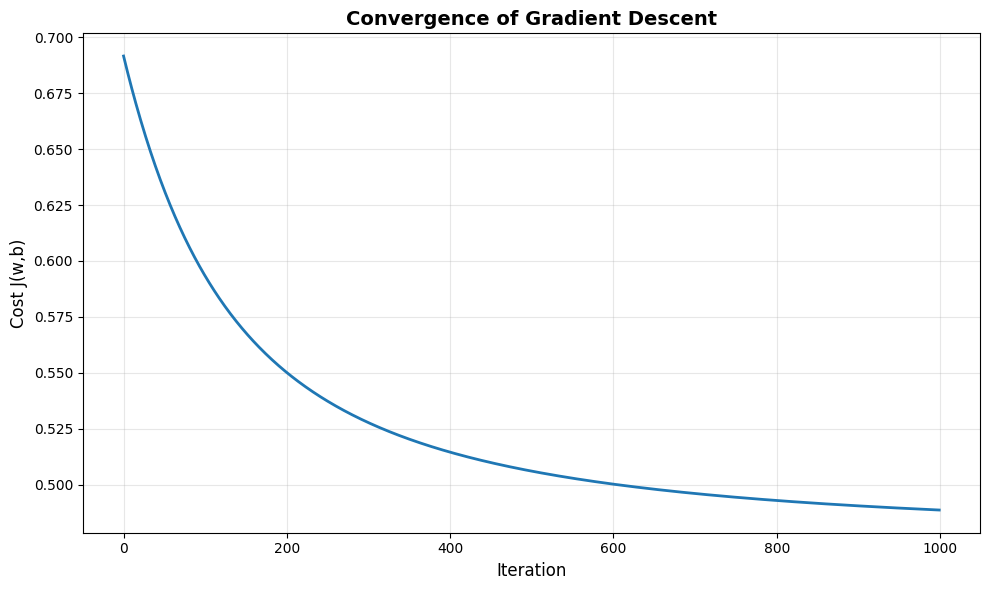


Convergence Analysis:
  Change in last 100 iterations: 0.00186039
  ⚠ Model might need more iterations


In [100]:
plt.figure(figsize=(10, 6))
plt.plot(J_history, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(w,b)', fontsize=12)
plt.title('Convergence of Gradient Descent', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Verificar convergencia en las últimas 100 iteraciones
last_100 = J_history[-100:]
convergence_change = abs(last_100[-1] - last_100[0])
print(f"\nConvergence Analysis:")
print(f"  Change in last 100 iterations: {convergence_change:.8f}")
if convergence_change < 1e-6:
    print("  ✓ Model has converged (change < 1e-6)")
else:
    print("  ⚠ Model might need more iterations")

### Prediction Function

In [101]:
def predict(w, b, X, threshold=0.5):
    """
    Predict classes (0 o 1)
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        threshold: float - decision threshold
    
    Returns:
        predictions: array (m,) - predictions 0 o 1
        probabilities: array (m,) - probabilities f ∈ [0,1]
    """
    z = X @ w + b
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    
    return predictions, probabilities

In [102]:
y_train_pred, y_train_prob = predict(w_trained, b_trained, X_train_normalized)
y_test_pred, y_test_prob = predict(w_trained, b_trained, X_test_normalized)

# Some predictions
print("\nFirst 10 predictions on TEST set:")
print(f"{'Real':>6} {'Pred':>6} {'Prob':>8}")
print("-" * 25)
for i in range(min(10, len(y_test))):
    print(f"{y_test[i]:>6} {y_test_pred[i]:>6} {y_test_prob[i]:>8.4f}")


First 10 predictions on TEST set:
  Real   Pred     Prob
-------------------------
     1      1   0.6764
     1      1   0.9407
     0      0   0.2434
     0      1   0.6939
     1      1   0.6067
     0      0   0.3149
     1      1   0.8787
     0      0   0.3404
     1      0   0.2950
     0      0   0.3145


### Metrics

In [103]:
def compute_metrics(y_real, y_pred):
    """
    Compute accuracy, precision, recall, F1-score.
    
    Metrics:
    - Accuracy: (TP + TN) / Total
    - Precision: TP / (TP + FP)  "Of those I predicted positive, how many were correct?"
    - Recall: TP / (TP + FN)     "Of the actual positive cases, how many did I detect?"
    - F1-Score: 2·(Precision·Recall) / (Precision + Recall)
    
    where:
        TP = True Positives (predicted 1, real 1)
        TN = True Negatives (predicted 0, real 0)
        FP = False Positives (predicted 1, real 0)
        FN = False Negatives (predicted 0, real 1)
    """
    
    TP = np.sum((y_pred == 1) & (y_real == 1))
    TN = np.sum((y_pred == 0) & (y_real == 0))
    FP = np.sum((y_pred == 1) & (y_real == 0))
    FN = np.sum((y_pred == 0) & (y_real == 1))
    
    # Metrics
    accuracy = (TP + TN) / len(y_real)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


# train metrics
metrics_train = compute_metrics(y_train, y_train_pred)

# test metrics
metrics_test = compute_metrics(y_test, y_test_pred)

print("\n📊 TRAINING SET:")
print(f"  Accuracy:  {metrics_train['Accuracy']:.4f} ({metrics_train['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_train['Precision']:.4f}")
print(f"  Recall:    {metrics_train['Recall']:.4f}")
print(f"  F1-Score:  {metrics_train['F1-Score']:.4f}")
print(f"  Confusion Matrix: TP={metrics_train['TP']}, TN={metrics_train['TN']}, FP={metrics_train['FP']}, FN={metrics_train['FN']}")

print("\n📊 TEST SET:")
print(f"  Accuracy:  {metrics_test['Accuracy']:.4f} ({metrics_test['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_test['Precision']:.4f}")
print(f"  Recall:    {metrics_test['Recall']:.4f}")
print(f"  F1-Score:  {metrics_test['F1-Score']:.4f}")
print(f"  Confusion Matrix: TP={metrics_test['TP']}, TN={metrics_test['TN']}, FP={metrics_test['FP']}, FN={metrics_test['FN']}")




📊 TRAINING SET:
  Accuracy:  0.7725 (77.25%)
  Precision: 0.7887
  Recall:    0.6667
  F1-Score:  0.7226
  Confusion Matrix: TP=56, TN=90, FP=15, FN=28

📊 TEST SET:
  Accuracy:  0.8519 (85.19%)
  Precision: 0.8529
  Recall:    0.8056
  F1-Score:  0.8286
  Confusion Matrix: TP=29, TN=40, FP=5, FN=7


In [104]:
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [
        f"{metrics_train['Accuracy']:.4f}",
        f"{metrics_train['Precision']:.4f}",
        f"{metrics_train['Recall']:.4f}",
        f"{metrics_train['F1-Score']:.4f}"
    ],
    'Test': [
        f"{metrics_test['Accuracy']:.4f}",
        f"{metrics_test['Precision']:.4f}",
        f"{metrics_test['Recall']:.4f}",
        f"{metrics_test['F1-Score']:.4f}"
    ]
})

print(comparison.to_string(index=False))

# overfitting detection
acc_diff = metrics_train['Accuracy'] - metrics_test['Accuracy']
if acc_diff > 0.05:
    print(f"\n⚠ WARNING: Possible overfitting (diff accuracy = {acc_diff:.4f})")
else:
    print(f"\n✓ There is no significant overfitting. (diff accuracy = {acc_diff:.4f})")

print("\n" + "="*80)
print("✅ STEP 2 COMPLETED")
print("="*80)

   Metric  Train   Test
 Accuracy 0.7725 0.8519
Precision 0.7887 0.8529
   Recall 0.6667 0.8056
 F1-Score 0.7226 0.8286

✓ There is no significant overfitting. (diff accuracy = -0.0794)

✅ STEP 2 COMPLETED


## Step 3: Visualize Decision Boundaries

**In this step we will:**
1. Select 3 pairs of features
2. Train 2D models (one for each pair)
3. Visualize the decision boundaries
4. Analyze the separability of the classes

**Selected pairs:**
1. Age - Cholesterol
2. BP - Max HR  
3. ST depression - Number of vessels fluro

In [105]:

feature_pairs = [
    ('Age', 'Cholesterol'),
    ('BP', 'Max HR'),
    ('ST depression', 'Number of vessels fluro')
]

feature_indices = {name: idx for idx, name in enumerate(feature_names)}


In [106]:
def train_model_2d(X_train_2d, y_train, alpha=0.1, num_iters=1000):
    """
    Train a 2D logistic regression model.
    
    Args:
        X_train_2d: array (m, 2) - only 2 features
        y_train: array (m,)
        alpha: float - learning rate
        num_iters: int - iterations
    
    Returns:
        w: array (2,) - weights
        b: float - bias
        J_history: list - history of cost
    """
    
    w_init = np.zeros(2)  
    b_init = 0.0
    
    w, b, J_history = gradient_descent(
        X_train_2d, 
        y_train, 
        w_init, 
        b_init, 
        alpha, 
        num_iters,
        print_every=0
    )
    
    return w, b, J_history


In [107]:
# we need to be able to denormalize
# x_normalized = (x - mean) / std
# x_original = x_normalized * std + mean

def denormalize_features(X_normalized, feature_indices_pair, mean_train, std_train):
    """
    Denormalize the selected features.
    
    Args:
        X_normalized: array (m, 2) - normalized data
        feature_indices_pair: tuple (idx1, idx2) - feature indexes
        mean_train: array (n_features,) - means used in normalization
        std_train: array (n_features,) - stds used in normalization
    
    Returns:
        X_original: array (m, 2) - original scale data
        mean_pair: array (2,) - means of these 2 features
        std_pair: array (2,) - stds of these 2 features
    """
    idx1, idx2 = feature_indices_pair
    
    mean_pair = np.array([mean_train[idx1], mean_train[idx2]])
    std_pair = np.array([std_train[idx1], std_train[idx2]])
    
    X_original = X_normalized * std_pair + mean_pair
    
    return X_original, mean_pair, std_pair

In [108]:
def transform_boundary_to_original(w_norm, b_norm, mean_pair, std_pair):
    """
    Transform the model parameters (trained on normalized data)
    to the original space.
    
    Args:
        w_norm: array (2,) - weights in standardized space
        b_norm: float - bias in normalized space
        mean_pair: array (2,) - means
        std_pair: array (2,) - stds
    
    Returns:
        w_orig: array (2,) - weights in original space
        b_orig: float - bias in original space
    """
    w_orig = w_norm / std_pair
    b_orig = b_norm - np.dot(w_norm, mean_pair / std_pair)
    
    return w_orig, b_orig

In [109]:
def plot_decision_boundary_2d(w, b, X_normalized, y, 
                                       feature_names_pair, 
                                       feature_indices_pair,
                                       mean_train, std_train,
                                       metrics=None):
    """
    Decision boundary graph with ORIGINAL values.
    
    Args:
        w: array (2,) - weights of the model (trained on normalized data)
        b: float - bias of the model
        X_normalized: array (m, 2) - normalized data (to be denormalized)
        y: array (m,) - labels
        feature_names_pair: tuple (str, str) - feature names
        feature_indices_pair: tuple (int, int) - feature indices
        mean_train: array (n_features,) - means of train set
        std_train: array (n_features,) - stds of train set
        metrics: dict - metrics to show in title 
    """
    # Denormalize the data
    X_original, mean_pair, std_pair = denormalize_features(
        X_normalized, feature_indices_pair, mean_train, std_train
    )
    
    # Transform the decision boundary to the original space
    w_orig, b_orig = transform_boundary_to_original(w, b, mean_pair, std_pair)
    

    fig, ax = plt.subplots(figsize=(10, 7))
    
    mask_0 = (y == 0)
    mask_1 = (y == 1)
    
    ax.scatter(X_original[mask_0, 0], X_original[mask_0, 1], 
               c='green', marker='o', s=60, alpha=0.6, 
               edgecolors='k', linewidth=0.5, label='Absence (y=0)')
    
    ax.scatter(X_original[mask_1, 0], X_original[mask_1, 1], 
               c='red', marker='x', s=70, alpha=0.8, 
               linewidth=2.5, label='Presence (y=1)')
    
    x0_min, x0_max = X_original[:, 0].min(), X_original[:, 0].max()
    margin = (x0_max - x0_min) * 0.1
    x0_min -= margin
    x0_max += margin
    
    x0_vals = np.linspace(x0_min, x0_max, 300)
    
    if abs(w_orig[1]) > 1e-6:
        
        x1_vals = -(w_orig[0] * x0_vals + b_orig) / w_orig[1]
        ax.plot(x0_vals, x1_vals, 'b-', linewidth=3, 
                label='Decision Boundary', zorder=5)
    else:
        
        x0_boundary = -b_orig / w_orig[0]
        ax.axvline(x0_boundary, color='blue', linewidth=3, 
                   linestyle='-', label='Decision Boundary', zorder=5)
    
    # Shade regions
    x1_min, x1_max = X_original[:, 1].min(), X_original[:, 1].max()
    margin_1 = (x1_max - x1_min) * 0.1
    x1_min -= margin_1
    x1_max += margin_1
    
    x0_mesh = np.linspace(x0_min, x0_max, 150)
    x1_mesh = np.linspace(x1_min, x1_max, 150)
    X0_mesh, X1_mesh = np.meshgrid(x0_mesh, x1_mesh)
    
    
    X_mesh_flat = np.c_[X0_mesh.ravel(), X1_mesh.ravel()]
    Z = sigmoid(X_mesh_flat @ w_orig + b_orig)
    Z = Z.reshape(X0_mesh.shape)
    
    
    contour = ax.contourf(X0_mesh, X1_mesh, Z, 
                          levels=[0, 0.5, 1.0], 
                          colors=['lightgreen', 'lightcoral'], 
                          alpha=0.2, zorder=1)
    
    
    ax.set_xlabel(feature_names_pair[0], fontsize=13, fontweight='bold')
    ax.set_ylabel(feature_names_pair[1], fontsize=13, fontweight='bold')

    title = f'Decision Boundary: {feature_names_pair[0]} vs {feature_names_pair[1]}'
    if metrics:
        title += f'\nAcc: {metrics["Accuracy"]:.3f} | Prec: {metrics["Precision"]:.3f} | Rec: {metrics["Recall"]:.3f} | F1: {metrics["F1-Score"]:.3f}'
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15)
    
    
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    ax.set_xlim(x0_min, x0_max)
    ax.set_ylim(x1_min, x1_max)
    
    plt.tight_layout()
    plt.show()


Age vs Cholesterol

Data:
  X_train shape: (189, 2)
  X_test shape: (81, 2)

Training model...
  Parameters:
    w = [0.29855899 0.08279074]
    b = -0.208177
  Final cost: J = 0.672163

📊 Test Metrics:
  Accuracy:  0.6296 (62.96%)
  Precision: 0.6250
  Recall:    0.4167
  F1-Score:  0.5000


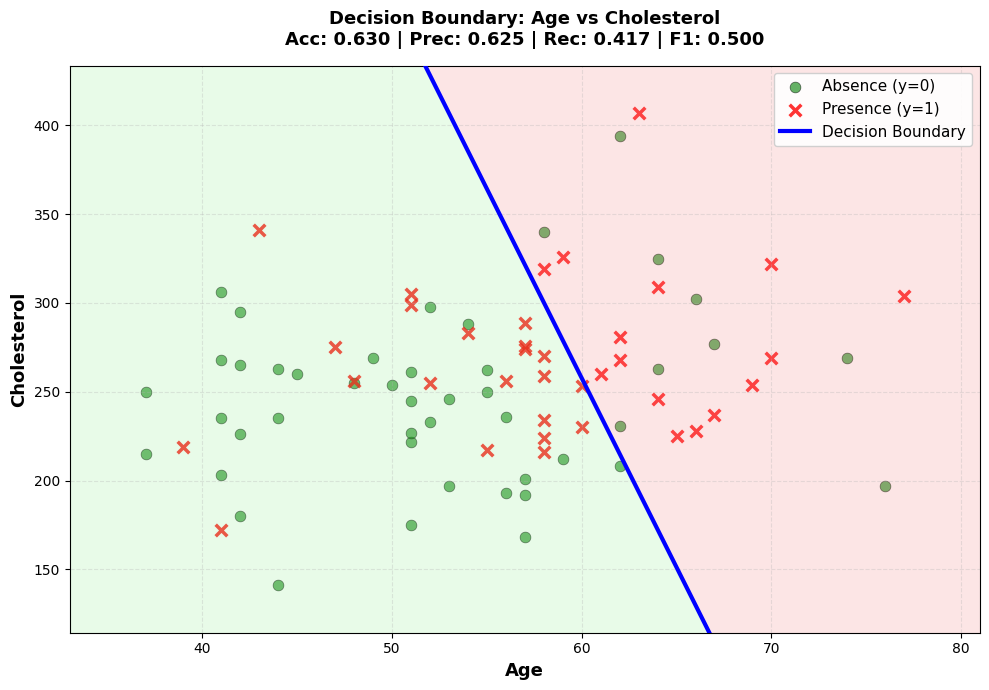

In [110]:
print("="*80)
print("Age vs Cholesterol")
print("="*80)


feature1, feature2 = 'Age', 'Cholesterol'
idx1 = feature_indices[feature1]
idx2 = feature_indices[feature2]
feature_indices_pair = (idx1, idx2)


X_train_2d_pair1 = X_train_normalized[:, [idx1, idx2]]
X_test_2d_pair1 = X_test_normalized[:, [idx1, idx2]]

print(f"\nData:")
print(f"  X_train shape: {X_train_2d_pair1.shape}")
print(f"  X_test shape: {X_test_2d_pair1.shape}")

print(f"\nTraining model...")
w_pair1, b_pair1, J_history_pair1 = train_model_2d(
    X_train_2d_pair1, 
    y_train, 
    alpha=0.01, 
    num_iters=1000
)

print(f"  Parameters:")
print(f"    w = {w_pair1}")
print(f"    b = {b_pair1:.6f}")
print(f"  Final cost: J = {J_history_pair1[-1]:.6f}")


y_test_pred_pair1, _ = predict(w_pair1, b_pair1, X_test_2d_pair1)
metrics_pair1 = compute_metrics(y_test, y_test_pred_pair1)

print(f"\n📊 Test Metrics:")
print(f"  Accuracy:  {metrics_pair1['Accuracy']:.4f} ({metrics_pair1['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_pair1['Precision']:.4f}")
print(f"  Recall:    {metrics_pair1['Recall']:.4f}")
print(f"  F1-Score:  {metrics_pair1['F1-Score']:.4f}")


plot_decision_boundary_2d(
    w_pair1, b_pair1,
    X_test_2d_pair1, y_test,
    (feature1, feature2),
    feature_indices_pair,
    mean_train, std_train,
    metrics_pair1
)

#### Observations

- With only **62.96%** accuracy, this model performs the worst of the three pairs evaluated.

- The F1-score of 0.50 indicates a poor balance between accuracy and recall.

- The final cost (0.672) is the highest, suggesting that the model does not converge adequately to an optimal solution.

- The recall rate of **41.67%** is too low, indicating that the model only correctly detects 4 out of every 10 patients who actually have heart disease.

BP vs Max HR

Data:
  X_train shape: (189, 2)
  X_test shape: (81, 2)

Training model...
  Parameters:
    w = [ 0.17316247 -0.8235097 ]
    b = -0.215662
  Final cost: J = 0.589344

📊 Test Metrics:
  Accuracy:  0.7284 (72.84%)
  Precision: 0.7188
  Recall:    0.6389
  F1-Score:  0.6765


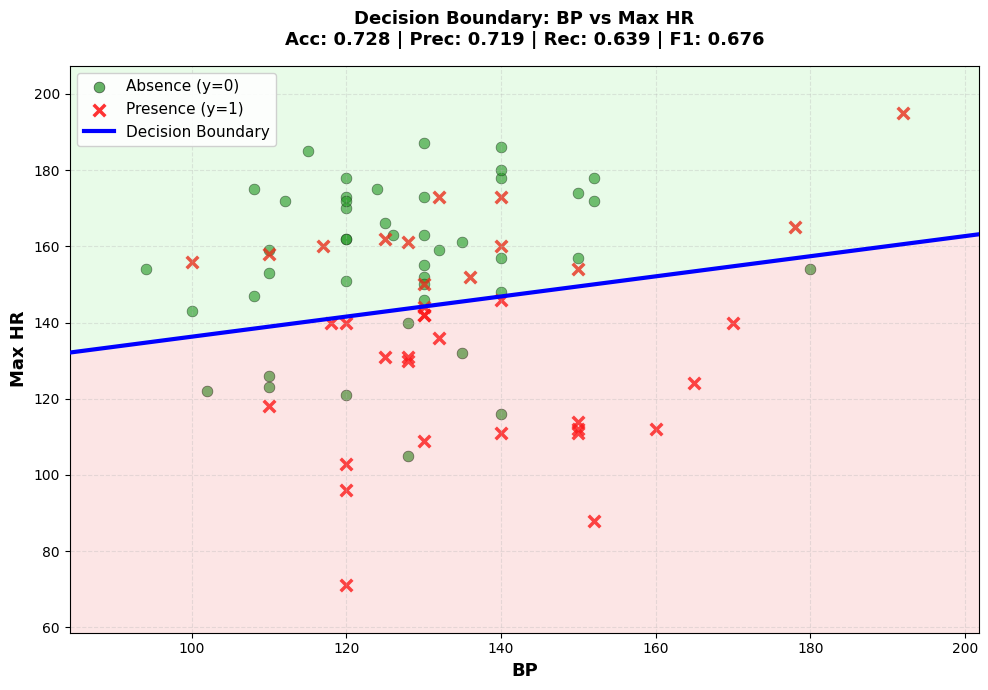

In [111]:
print("="*80)
print("BP vs Max HR")
print("="*80)

feature1, feature2 = 'BP', 'Max HR'
idx1 = feature_indices[feature1]
idx2 = feature_indices[feature2]
feature_indices_pair = (idx1, idx2)

X_train_2d_pair2 = X_train_normalized[:, [idx1, idx2]]
X_test_2d_pair2 = X_test_normalized[:, [idx1, idx2]]

print(f"\nData:")
print(f"  X_train shape: {X_train_2d_pair2.shape}")
print(f"  X_test shape: {X_test_2d_pair2.shape}")

print(f"\nTraining model...")
w_pair2, b_pair2, J_history_pair2 = train_model_2d(
    X_train_2d_pair2, 
    y_train, 
    alpha=0.01, 
    num_iters=1000
)

print(f"  Parameters:")
print(f"    w = {w_pair2}")
print(f"    b = {b_pair2:.6f}")
print(f"  Final cost: J = {J_history_pair2[-1]:.6f}")

y_test_pred_pair2, _ = predict(w_pair2, b_pair2, X_test_2d_pair2)
metrics_pair2 = compute_metrics(y_test, y_test_pred_pair2)

print(f"\n📊 Test Metrics:")
print(f"  Accuracy:  {metrics_pair2['Accuracy']:.4f} ({metrics_pair2['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_pair2['Precision']:.4f}")
print(f"  Recall:    {metrics_pair2['Recall']:.4f}")
print(f"  F1-Score:  {metrics_pair2['F1-Score']:.4f}")

plot_decision_boundary_2d(
    w_pair2, b_pair2,
    X_test_2d_pair2, y_test,
    (feature1, feature2),
    feature_indices_pair,
    mean_train, std_train,
    metrics_pair2
)

#### Observations

- 10 percentage point increase in accuracy compared to the previous model.

- The F1-score of 0.6765 indicates a more balanced performance between precision and recall.

- The final cost is lower, suggesting a better model fit.

- The recall rate of **63.89%** represents an improvement over the previous model.

- Approximately 6 out of every 10 patients with the disease are now detected.

ST depression vs Number of vessels fluro

Data:
  X_train shape: (189, 2)
  X_test shape: (81, 2)

Training model...
  Parameters:
    w = [0.70454709 0.83982846]
    b = -0.182734
  Final cost: J = 0.519109

📊 Test Metrics:
  Accuracy:  0.7778 (77.78%)
  Precision: 0.8000
  Recall:    0.6667
  F1-Score:  0.7273


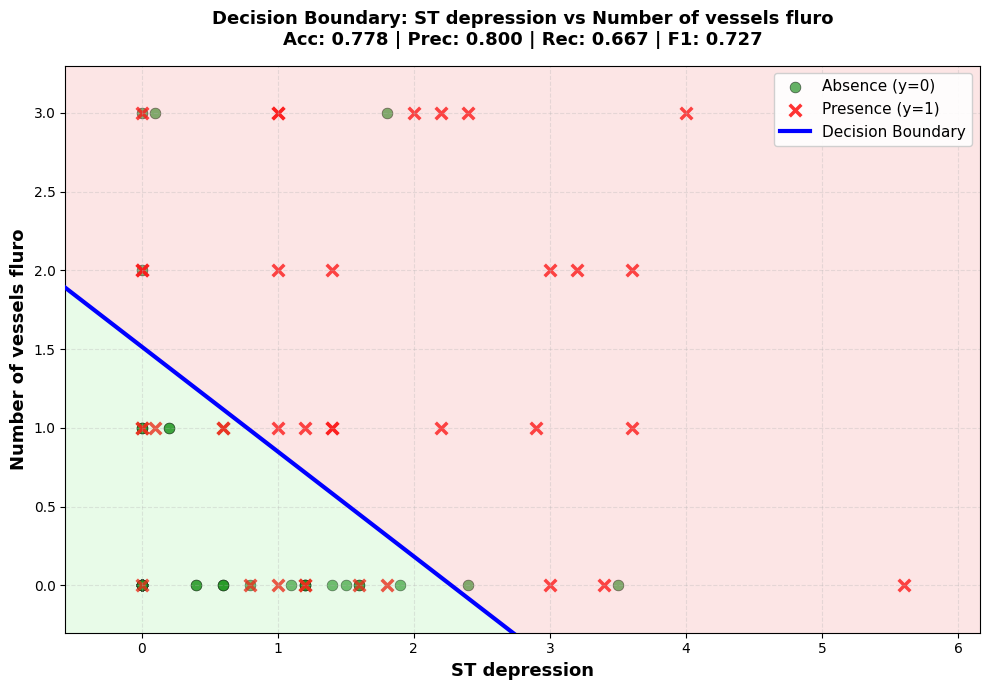

In [112]:
print("="*80)
print("ST depression vs Number of vessels fluro")
print("="*80)


feature1, feature2 = 'ST depression', 'Number of vessels fluro'
idx1 = feature_indices[feature1]
idx2 = feature_indices[feature2]
feature_indices_pair = (idx1, idx2)

X_train_2d_pair3 = X_train_normalized[:, [idx1, idx2]]
X_test_2d_pair3 = X_test_normalized[:, [idx1, idx2]]

print(f"\nData:")
print(f"  X_train shape: {X_train_2d_pair3.shape}")
print(f"  X_test shape: {X_test_2d_pair3.shape}")


print(f"\nTraining model...")
w_pair3, b_pair3, J_history_pair3 = train_model_2d(
    X_train_2d_pair3, 
    y_train, 
    alpha=0.01, 
    num_iters=1000
)

print(f"  Parameters:")
print(f"    w = {w_pair3}")
print(f"    b = {b_pair3:.6f}")
print(f"  Final cost: J = {J_history_pair3[-1]:.6f}")

y_test_pred_pair3, _ = predict(w_pair3, b_pair3, X_test_2d_pair3)
metrics_pair3 = compute_metrics(y_test, y_test_pred_pair3)

print(f"\n📊 Test Metrics:")
print(f"  Accuracy:  {metrics_pair3['Accuracy']:.4f} ({metrics_pair3['Accuracy']*100:.2f}%)")
print(f"  Precision: {metrics_pair3['Precision']:.4f}")
print(f"  Recall:    {metrics_pair3['Recall']:.4f}")
print(f"  F1-Score:  {metrics_pair3['F1-Score']:.4f}")

plot_decision_boundary_2d(
    w_pair3, b_pair3,
    X_test_2d_pair3, y_test,
    (feature1, feature2),
    feature_indices_pair,
    mean_train, std_train,
    metrics_pair3
)

#### Observations

- Better performance of the 2D models
- Accuracy of **77.78%**, the highest among the three models evaluated.

- With an accuracy of **80%**, the model is correct 8 out of 10 times.

- Lower cost among the models.

- ST Depression is a good indicator since elevated values ​​indicate coronary artery involvement, which is a direct biomarker of heart disease.

- Number of Vessels Fluro is also a good indicator to consider for detecting obstructed vessels.

- These variables represent direct measurements of cardiac pathology, they are not risk factors, but rather objective evidence of disease, which explains why this pair outperforms the other two.

In [113]:
print("\n" + "="*80)
print("Results Comparison for 2D Models")
print("="*80)

results_2d = [
    {
        'pair': ('Age', 'Cholesterol'),
        'w': w_pair1,
        'b': b_pair1,
        'metrics': metrics_pair1,
        'J_final': J_history_pair1[-1]
    },
    {
        'pair': ('BP', 'Max HR'),
        'w': w_pair2,
        'b': b_pair2,
        'metrics': metrics_pair2,
        'J_final': J_history_pair2[-1]
    },
    {
        'pair': ('ST depression', 'Number of vessels fluro'),
        'w': w_pair3,
        'b': b_pair3,
        'metrics': metrics_pair3,
        'J_final': J_history_pair3[-1]
    }
]

comparison_df = pd.DataFrame([
    {
        'Pair': f"{r['pair'][0]} - {r['pair'][1]}",
        'Accuracy': f"{r['metrics']['Accuracy']:.4f}",
        'Precision': f"{r['metrics']['Precision']:.4f}",
        'Recall': f"{r['metrics']['Recall']:.4f}",
        'F1-Score': f"{r['metrics']['F1-Score']:.4f}",
        'Costo Final': f"{r['J_final']:.6f}"
    }
    for r in results_2d
])

print("\n📊 Comparison Table:")
print(comparison_df.to_string(index=False))


print(f"\n🏆 Best pairs by metric:")
accuracies = [r['metrics']['Accuracy'] for r in results_2d]
precisions = [r['metrics']['Precision'] for r in results_2d]
recalls = [r['metrics']['Recall'] for r in results_2d]
f1s = [r['metrics']['F1-Score'] for r in results_2d]

best_acc_idx = np.argmax(accuracies)
best_prec_idx = np.argmax(precisions)
best_rec_idx = np.argmax(recalls)
best_f1_idx = np.argmax(f1s)

print(f"  Best Accuracy:  Pair {best_acc_idx+1} ({results_2d[best_acc_idx]['pair'][0]} - {results_2d[best_acc_idx]['pair'][1]}) = {accuracies[best_acc_idx]:.4f}")
print(f"  Best Precision: Pair {best_prec_idx+1} ({results_2d[best_prec_idx]['pair'][0]} - {results_2d[best_prec_idx]['pair'][1]}) = {precisions[best_prec_idx]:.4f}")
print(f"  Best Recall:    Pair {best_rec_idx+1} ({results_2d[best_rec_idx]['pair'][0]} - {results_2d[best_rec_idx]['pair'][1]}) = {recalls[best_rec_idx]:.4f}")
print(f"  Best F1-Score:  Pair {best_f1_idx+1} ({results_2d[best_f1_idx]['pair'][0]} - {results_2d[best_f1_idx]['pair'][1]}) = {f1s[best_f1_idx]:.4f}")

print(f"\n📊 Comparison with full model (6 features):")
print(f"  6D Model - Accuracy: {metrics_test['Accuracy']:.4f}")
print(f"  Best 2D Model - Accuracy: {max(accuracies):.4f}")
print(f"  Difference: {metrics_test['Accuracy'] - max(accuracies):.4f}")
print(f"\n💡 The 6D model is better because it uses more information (expected).")


Results Comparison for 2D Models

📊 Comparison Table:
                                   Pair Accuracy Precision Recall F1-Score Costo Final
                      Age - Cholesterol   0.6296    0.6250 0.4167   0.5000    0.672163
                            BP - Max HR   0.7284    0.7188 0.6389   0.6765    0.589344
ST depression - Number of vessels fluro   0.7778    0.8000 0.6667   0.7273    0.519109

🏆 Best pairs by metric:
  Best Accuracy:  Pair 3 (ST depression - Number of vessels fluro) = 0.7778
  Best Precision: Pair 3 (ST depression - Number of vessels fluro) = 0.8000
  Best Recall:    Pair 3 (ST depression - Number of vessels fluro) = 0.6667
  Best F1-Score:  Pair 3 (ST depression - Number of vessels fluro) = 0.7273

📊 Comparison with full model (6 features):
  6D Model - Accuracy: 0.8519
  Best 2D Model - Accuracy: 0.7778
  Difference: 0.0741

💡 The 6D model is better because it uses more information (expected).


#### Comparison

The 6-feature model achieves 8.5 percentage points more accuracy than the best 2D model, representing a reduction in error. By including demographic, biochemical, functional, and diagnostic data, the model achieves synergy among the features to improve the model, In this way, the features capture different aspects of cardiovascular health.

## Step 4 Repeat with Regularization

**Problem:** With many features or complex models, the model can:
- Overfit the training set
- Generalize poorly to the test set

**Solution:** L2 Regularization (Ridge)
- Penalizes large weights by adding λ·||w||² to the cost
- Forces the model to use smaller weights
- Result: Simpler and more generalizable model

- Add L2 to cost/gradients (λ/(2m)||w||²; dw += (λ/m)w).
- Tune λ ([0, 0.001, 0.01, 0.1, 1]); retrain full model + pairs.
- Re-plot costs/boundaries (one pair: unreg vs. reg). Re-eval metrics/||w||.

In [114]:
def compute_cost_regularized(w, b, X, y, lambda_):
    """
    Regularized logistic regression cost.
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        y: array (m,)
        lambda_: float - regularization parameter
    
    Returns:
        J_reg: float - regularized cost
    """
    m = X.shape[0]
    z = X @ w + b
    f = sigmoid(z)
    
    eps = 1e-8
    f = np.clip(f, eps, 1 - eps)
    J = -(1/m) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))
    reg_term = (lambda_ / (2 * m)) * np.sum(w**2)
    J_reg = J + reg_term
    
    return J_reg

In [115]:
def compute_gradient_regularized(w, b, X, y, lambda_):
    """
    Gradient of regularized logistic regression cost.
    
    Args:
        w: array (n_features,)
        b: float
        X: array (m, n_features)
        y: array (m,)
        lambda_: float
    
    Returns:
        dj_dw: array (n_features,) - regularized gradient respect to w
        dj_db: float - gradient respect to b
    """
    m = X.shape[0]

    z = X @ w + b
    f = sigmoid(z)
    error = f - y

    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    dj_dw_reg = dj_dw + (lambda_ / m) * w
    
    return dj_dw_reg, dj_db



In [116]:
def gradient_descent_regularized(X, y, w_init, b_init, alpha, lambda_, num_iters, print_every=0):
    """
    Gradient descent with regularization.
    
    Args:
        X: array (m, n_features)
        y: array (m,)
        w_init: array (n_features,)
        b_init: float
        alpha: float - learning rate
        lambda_: float - regularization parameter
        num_iters: int
        print_every: int
    
    Returns:
        w, b, J_history
    """
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_regularized(w, b, X, y, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost_regularized(w, b, X, y, lambda_)
        J_history.append(J)
        
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"  Iteration {i:5d}: J = {J:.6f}")
    
    return w, b, J_history


In [121]:
lambda_values = [0, 0.001, 0.01, 0.1, 1.0]

alpha = 0.1
num_iters = 5000

results_regularization = []

for lambda_ in lambda_values:
    print(f"\n{'='*80}")
    print(f"λ = {lambda_}")
    print(f"{'='*80}")

    w_init = np.zeros(n_features)
    b_init = 0.0

    print(f"\nTraining with λ={lambda_}...")
    w_reg, b_reg, J_history_reg = gradient_descent_regularized(
        X_train_normalized,
        y_train,
        w_init,
        b_init,
        alpha,
        lambda_,
        num_iters,
        print_every=1000
    )

    y_train_pred_reg, _ = predict(w_reg, b_reg, X_train_normalized)
    metrics_train_reg = compute_metrics(y_train, y_train_pred_reg)

    y_test_pred_reg, _ = predict(w_reg, b_reg, X_test_normalized)
    metrics_test_reg = compute_metrics(y_test, y_test_pred_reg)

    w_magnitude = np.linalg.norm(w_reg)

    print(f"\n📊 Results for λ={lambda_}:")
    print(f"  Final cost: {J_history_reg[-1]:.6f}")
    print(f"  weights magnitude ||w||: {w_magnitude:.6f}")
    print(f"\n  Train Accuracy: {metrics_train_reg['Accuracy']:.4f}")
    print(f"  Test Accuracy:  {metrics_test_reg['Accuracy']:.4f}")
    print(f"  Overfitting gap: {metrics_train_reg['Accuracy'] - metrics_test_reg['Accuracy']:.4f}")

    results_regularization.append({
        'lambda': lambda_,
        'w': w_reg,
        'b': b_reg,
        'w_magnitude': w_magnitude,
        'metrics_train': metrics_train_reg,
        'metrics_test': metrics_test_reg,
        'J_history': J_history_reg
    })



λ = 0

Training with λ=0...
  Iteration     0: J = 0.678293
  Iteration  1000: J = 0.479050
  Iteration  2000: J = 0.479050
  Iteration  3000: J = 0.479050
  Iteration  4000: J = 0.479050
  Iteration  4999: J = 0.479050

📊 Results for λ=0:
  Final cost: 0.479050
  weights magnitude ||w||: 1.565880

  Train Accuracy: 0.7831
  Test Accuracy:  0.8148
  Overfitting gap: -0.0317

λ = 0.001

Training with λ=0.001...
  Iteration     0: J = 0.678293
  Iteration  1000: J = 0.479057
  Iteration  2000: J = 0.479056
  Iteration  3000: J = 0.479056
  Iteration  4000: J = 0.479056
  Iteration  4999: J = 0.479056

📊 Results for λ=0.001:
  Final cost: 0.479056
  weights magnitude ||w||: 1.565767

  Train Accuracy: 0.7831
  Test Accuracy:  0.8148
  Overfitting gap: -0.0317

λ = 0.01

Training with λ=0.01...
  Iteration     0: J = 0.678293
  Iteration  1000: J = 0.479115
  Iteration  2000: J = 0.479115
  Iteration  3000: J = 0.479115
  Iteration  4000: J = 0.479115
  Iteration  4999: J = 0.479115

📊 Re

In [122]:
comparison_lambda = pd.DataFrame([
    {
        'λ  ': r['lambda'],
        '||w|| ': f"{r['w_magnitude']:.4f}",
        'Train Acc': f"{r['metrics_train']['Accuracy']:.4f}",
        'Test Acc': f"{r['metrics_test']['Accuracy']:.4f}",
        'Gap   ': f"{r['metrics_train']['Accuracy'] - r['metrics_test']['Accuracy']:.4f}",
        'Test Prec': f"{r['metrics_test']['Precision']:.4f}",
        'Test Rec': f"{r['metrics_test']['Recall']:.4f}",
        'Test F1': f"{r['metrics_test']['F1-Score']:.4f}"
    }
    for r in results_regularization
])

print("\n", comparison_lambda.to_string(index=False))

test_accuracies = [r['metrics_test']['Accuracy'] for r in results_regularization]
best_lambda_idx = np.argmax(test_accuracies)
best_lambda = results_regularization[best_lambda_idx]['lambda']
best_test_acc = test_accuracies[best_lambda_idx]

print(f"\n🏆 Best λ: {best_lambda}")
print(f"   Test Accuracy: {best_test_acc:.4f}")
print(f"   Improvement vs. Without regularization (λ=0): {best_test_acc - test_accuracies[0]:.4f}")


   λ   ||w||  Train Acc Test Acc  Gap    Test Prec Test Rec Test F1
0.000 1.5659    0.7831   0.8148 -0.0317    0.8000   0.7778  0.7887
0.001 1.5658    0.7831   0.8148 -0.0317    0.8000   0.7778  0.7887
0.010 1.5647    0.7831   0.8148 -0.0317    0.8000   0.7778  0.7887
0.100 1.5547    0.7831   0.8148 -0.0317    0.8000   0.7778  0.7887
1.000 1.4659    0.7725   0.8272 -0.0547    0.8235   0.7778  0.8000

🏆 Best λ: 1.0
   Test Accuracy: 0.8272
   Improvement vs. Without regularization (λ=0): 0.0123


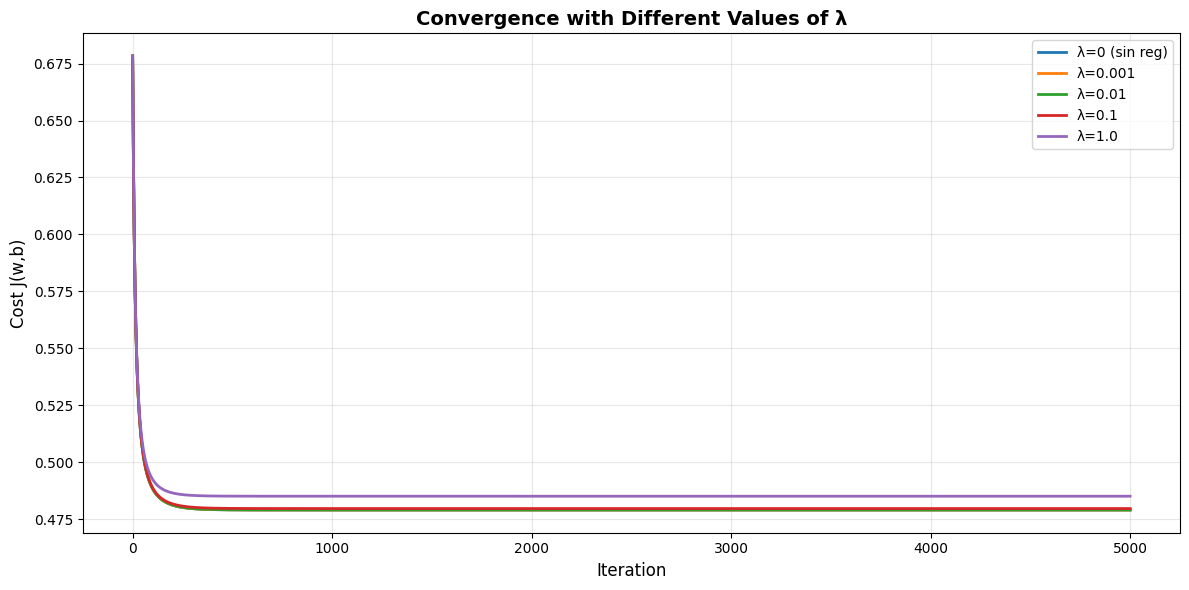


💡 Observations:
  - λ bigger → higher initial cost
  - All curves should converge
  - The cost includes the term λ·||w||², that's why it varies


In [123]:
plt.figure(figsize=(12, 6))

for r in results_regularization:
    lambda_ = r['lambda']
    J_history = r['J_history']
    label = f"λ={lambda_}" if lambda_ > 0 else "λ=0 (sin reg)"
    plt.plot(J_history, label=label, linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(w,b)', fontsize=12)
plt.title('Convergence with Different Values of λ', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  - λ bigger → higher initial cost")
print("  - All curves should converge")
print("  - The cost includes the term λ·||w||², that's why it varies")


Selected Pair: ST depression vs Number of vessels fluro

1. Training without regularization (λ=0)...

2. Training with regularization (λ=1.0)...


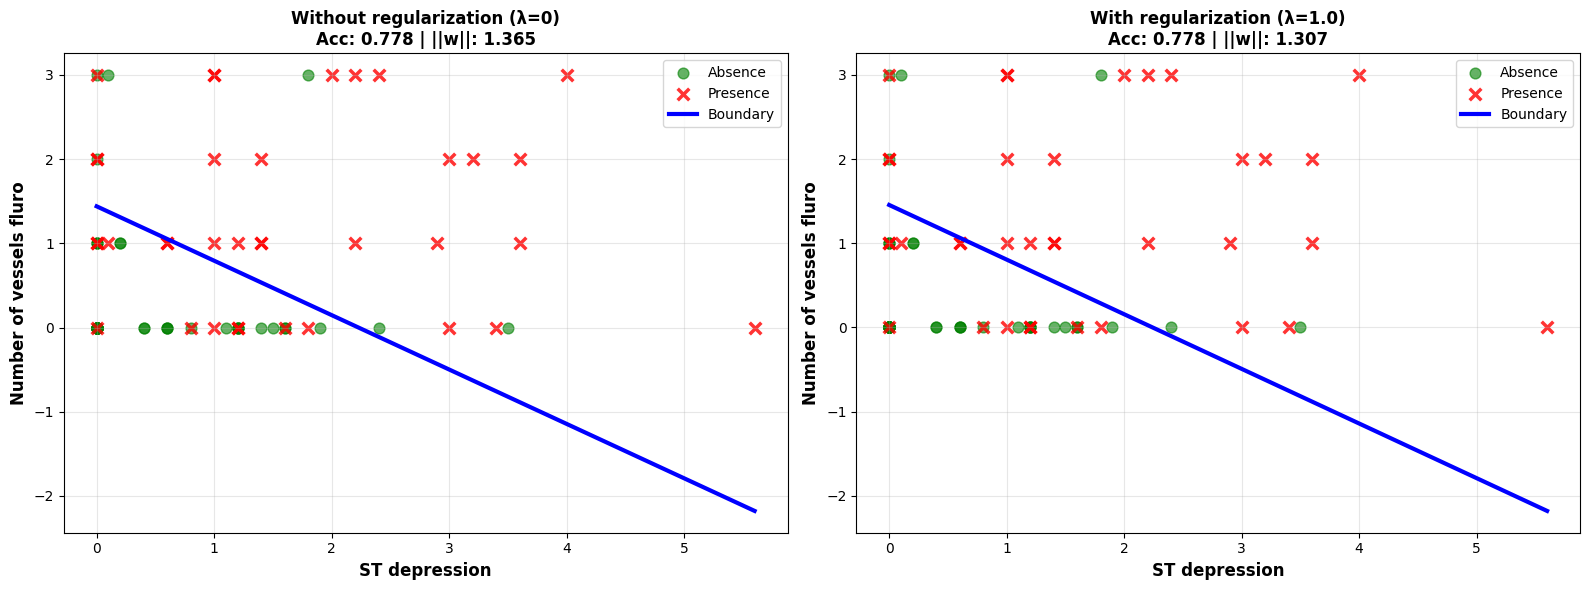


📊 Comparison:
  Without regularization: Acc=0.7778, ||w||=1.3648
  With regularization: Acc=0.7778, ||w||=1.3071


In [126]:
# Best pair
feature1, feature2 = 'ST depression', 'Number of vessels fluro' 
idx1 = feature_indices[feature1]
idx2 = feature_indices[feature2]
feature_indices_pair = (idx1, idx2)

X_train_2d = X_train_normalized[:, [idx1, idx2]]
X_test_2d = X_test_normalized[:, [idx1, idx2]]

print(f"\nSelected Pair: {feature1} vs {feature2}")

print(f"\n1. Training without regularization (λ=0)...")
w_unreg, b_unreg, _ = train_model_2d(X_train_2d, y_train, alpha=0.1, num_iters=5000)
y_test_pred_unreg, _ = predict(w_unreg, b_unreg, X_test_2d)
metrics_unreg = compute_metrics(y_test, y_test_pred_unreg)


print(f"\n2. Training with regularization (λ={best_lambda})...")
w_init = np.zeros(2)
b_init = 0.0
w_reg, b_reg, _ = gradient_descent_regularized(
    X_train_2d, y_train, w_init, b_init,
    alpha=0.1, lambda_=best_lambda, num_iters=5000
)
y_test_pred_reg, _ = predict(w_reg, b_reg, X_test_2d)
metrics_reg = compute_metrics(y_test, y_test_pred_reg)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


ax = axes[0]
X_original, mean_pair, std_pair = denormalize_features(X_test_2d, feature_indices_pair, mean_train, std_train)
w_orig_unreg, b_orig_unreg = transform_boundary_to_original(w_unreg, b_unreg, mean_pair, std_pair)

mask_0 = (y_test == 0)
mask_1 = (y_test == 1)
ax.scatter(X_original[mask_0, 0], X_original[mask_0, 1], c='green', marker='o', s=60, alpha=0.6, label='Absence')
ax.scatter(X_original[mask_1, 0], X_original[mask_1, 1], c='red', marker='x', s=70, alpha=0.8, linewidth=2.5, label='Presence')

x0_vals = np.linspace(X_original[:, 0].min(), X_original[:, 0].max(), 300)
if abs(w_orig_unreg[1]) > 1e-6:
    x1_vals = -(w_orig_unreg[0] * x0_vals + b_orig_unreg) / w_orig_unreg[1]
    ax.plot(x0_vals, x1_vals, 'b-', linewidth=3, label='Boundary')
ax.set_xlabel(feature1, fontsize=12, fontweight='bold')
ax.set_ylabel(feature2, fontsize=12, fontweight='bold')
ax.set_title(f'Without regularization (λ=0)\nAcc: {metrics_unreg["Accuracy"]:.3f} | ||w||: {np.linalg.norm(w_unreg):.3f}', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
w_orig_reg, b_orig_reg = transform_boundary_to_original(w_reg, b_reg, mean_pair, std_pair)

ax.scatter(X_original[mask_0, 0], X_original[mask_0, 1], c='green', marker='o', s=60, alpha=0.6, label='Absence')
ax.scatter(X_original[mask_1, 0], X_original[mask_1, 1], c='red', marker='x', s=70, alpha=0.8, linewidth=2.5, label='Presence')

if abs(w_orig_reg[1]) > 1e-6:
    x1_vals = -(w_orig_reg[0] * x0_vals + b_orig_reg) / w_orig_reg[1]
    ax.plot(x0_vals, x1_vals, 'b-', linewidth=3, label='Boundary')
ax.set_xlabel(feature1, fontsize=12, fontweight='bold')
ax.set_ylabel(feature2, fontsize=12, fontweight='bold')
ax.set_title(f'With regularization (λ={best_lambda})\nAcc: {metrics_reg["Accuracy"]:.3f} | ||w||: {np.linalg.norm(w_reg):.3f}', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Comparison:")
print(f"  Without regularization: Acc={metrics_unreg['Accuracy']:.4f}, ||w||={np.linalg.norm(w_unreg):.4f}")
print(f"  With regularization: Acc={metrics_reg['Accuracy']:.4f}, ||w||={np.linalg.norm(w_reg):.4f}")

### Observations

- Regularization is NOT improving accuracy in this case.
- Both models rank exactly the same in the test set.
- The regularization IS "shrinking" weights, as the reduction from 1.3648 to 1.3071 indicates that λ is acting, but gently.